# Intro to Data Analysis with Python, Session 3

## Read Bluebikes trip and station data

We won't use it quite yet, but let's get the Bluebikes trip and station data
loaded in so it's there when we need it.

In [1]:
import pandas as pd

trips_df = pd.read_csv("shared_data/202303-bluebikes-tripdata.csv")
stations_df = pd.read_csv("shared_data/current_bluebikes_stations.csv")

trips_df  # just to remind you what the trip data looks like

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,postal code
0,1105,2023-03-01 00:00:44.1520,2023-03-01 00:19:09.9080,386,Sennott Park Broadway at Norfolk Street,42.368605,-71.099302,403,Marion St at Harvard St,42.340122,-71.120706,6680,Subscriber,02139
1,415,2023-03-01 00:01:45.6530,2023-03-01 00:08:41.5960,12,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,42.336244,-71.087986,30,Brigham Circle - Francis St at Huntington Ave,42.334629,-71.104079,8142,Subscriber,02072
2,169,2023-03-01 00:03:54.2260,2023-03-01 00:06:43.6980,12,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,42.336244,-71.087986,160,Wentworth Institute of Technology - Huntington...,42.337586,-71.096271,4727,Subscriber,02115
3,624,2023-03-01 00:04:13.8340,2023-03-01 00:14:38.0830,386,Sennott Park Broadway at Norfolk Street,42.368605,-71.099302,378,191 Beacon St,42.380323,-71.108786,6044,Subscriber,02139
4,1116,2023-03-01 00:05:04.3640,2023-03-01 00:23:40.5370,554,Forsyth St at Huntington Ave,42.339202,-71.090511,282,Stony Brook T Stop,42.316966,-71.104374,3724,Subscriber,02130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198998,322,2023-03-31 23:55:01.5580,2023-04-01 00:00:23.8260,550,Somerville High School & Central Library,42.386400,-71.096010,156,Somerville Hospital,42.390446,-71.108566,3416,Customer,02144
198999,748,2023-03-31 23:55:24.1380,2023-04-01 00:07:52.3050,61,Boylston St at Fairfield St,42.348804,-71.082369,178,MIT Pacific St at Purrington St,42.359573,-71.101295,5404,Subscriber,02139
199000,1071,2023-03-31 23:58:04.4970,2023-04-01 00:15:56.0240,381,Inman Square at Springfield St.,42.374267,-71.100265,36,Copley Square - Dartmouth St at Boylston St,42.349928,-71.077392,3734,Subscriber,02116
199001,1096,2023-03-31 23:58:37.6520,2023-04-01 00:16:53.7120,4,Tremont St at E Berkeley St,42.345392,-71.069616,437,Berkshire Street at Cambridge Street,42.372077,-71.089954,7539,Subscriber,02141


## Matplotlib basics

Matplotlib is a very powerful Python plotting package.

Pyplot is a module of Matplotlib which provides simple functions to add elements
like lines, images, text, etc. to the current plot.

In [2]:
# !pip install matplotlib 

import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

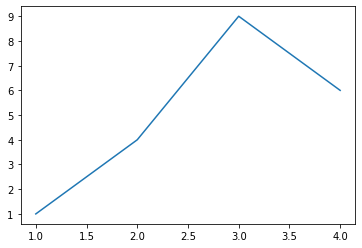

In [3]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 6])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

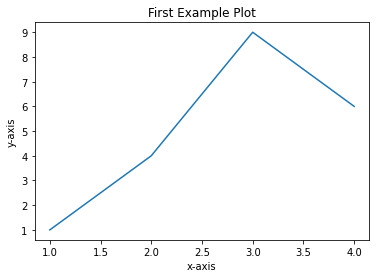

In [4]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 6])
plt.title("First Example Plot")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show

## Histograms

We will start with the trip duration data. First, we'll create a new field that
contains trip duration in minutes, rather than seconds. Then we'll create a
histogram of trips less than three hours.

In [5]:
trips_df["tripduration_min"] = trips_df["tripduration"] / 60

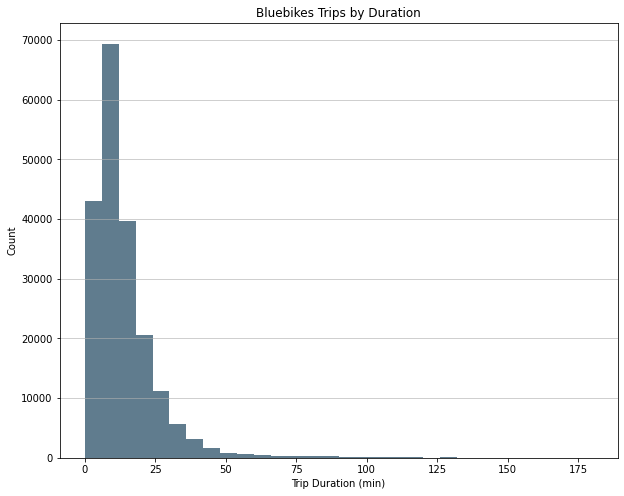

In [6]:
fig = plt.figure(figsize=(10, 8))
plt.hist(
    trips_df["tripduration_min"], bins=30, color="#607c8e", range=(0, 180)
)
plt.title("Bluebikes Trips by Duration")
plt.ylabel("Count")
plt.xlabel("Trip Duration (min)")
plt.grid(axis="y", alpha=0.75)
plt.savefig("trip_duration_histogram.png")

## Scatter Plots

Now let's create a scatter plot of trip duration by time of day. In order to
create the scatter plot, we need to first calculate the starting hour from the
"starttime" column.

In [7]:
trips_df["start_hour"] = (
    pd.to_datetime(trips_df["starttime"]).dt.hour
    + pd.to_datetime(trips_df["starttime"]).dt.minute / 60
)

trips_df["start_hour"].describe()  # the describe method is a great way to see a summary of a pandas object

count    199003.000000
mean         14.681081
std           4.821125
min           0.000000
25%          10.866667
50%          15.550000
75%          18.300000
max          23.983333
Name: start_hour, dtype: float64

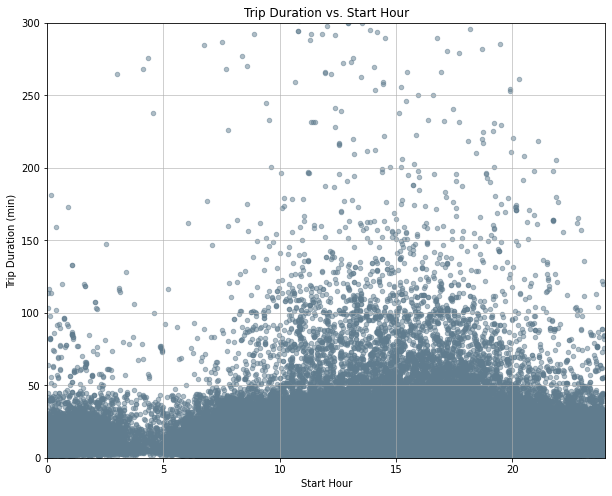

In [8]:
plt.figure(figsize=(10, 8))

plt.scatter(
    trips_df["start_hour"],
    trips_df["tripduration_min"],
    s=20,
    color="#607c8e",
    alpha=0.5
)
plt.ylim(0, 300)
plt.xlim(0, 24)
plt.title("Trip Duration vs. Start Hour")
plt.ylabel("Trip Duration (min)")
plt.xlabel("Start Hour")
plt.grid(alpha=0.75)


## Bar Charts

Let's create a bar chart of total trips by day. First, we'll need to create a
data frame of trips by day.

In [9]:
trips_df["start_day"] = pd.to_datetime(trips_df["starttime"]).dt.day
daily_trips = (
    trips_df.groupby("start_day")["start station name"].count().reset_index()
)
daily_trips.columns = ["day", "trips"]

daily_trips.head()

,day,trips
0,1,6822
1,2,5666
2,3,6843
3,4,2337
4,5,5328


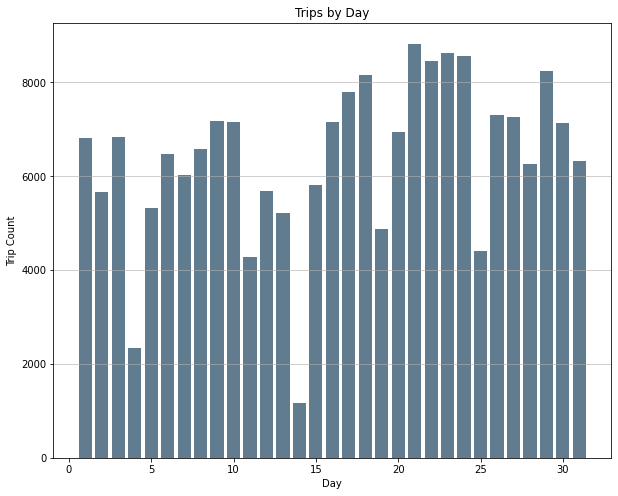

In [10]:
plt.figure(figsize=(10, 8))
plt.bar(daily_trips["day"], daily_trips["trips"], color="#607c8e")
plt.title("Trips by Day")
plt.xlabel("Day")
plt.ylabel("Trip Count")
plt.grid(axis="y", alpha=0.75)

## Line Charts

Finally, let's create a line chart of trips by day for the top five stations.

In [11]:
daily_trips_origin = (
    trips_df.groupby(["start_day", "start station name"])[
        "start station latitude"
    ]
    .count()
    .reset_index()
)
daily_trips_origin.columns = ["start day", "start station name", "daily trips"]
top_stations = (
    daily_trips_origin.groupby("start station name")["daily trips"]
    .sum()
    .reset_index()
)
top_stations = top_stations.sort_values(
    "daily trips", ascending=False
).reset_index(drop=True)
top_five_stations = top_stations["start station name"][:5]

top_five_stations

0             MIT at Mass Ave / Amherst St
1    Central Square at Mass Ave / Essex St
2      Harvard Square at Mass Ave/ Dunster
3          MIT Pacific St at Purrington St
4                            MIT Vassar St
Name: start station name, dtype: object

In [12]:
daily_trips_top_five = daily_trips_origin[
    daily_trips_origin["start station name"].isin(top_five_stations)
]
daily_trips_top_five

,start day,start station name,daily trips
60,1,Central Square at Mass Ave / Essex St,136
145,1,Harvard Square at Mass Ave/ Dunster,120
186,1,MIT Pacific St at Purrington St,100
188,1,MIT Vassar St,88
189,1,MIT at Mass Ave / Amherst St,171
...,...,...,...
10066,31,Central Square at Mass Ave / Essex St,96
10149,31,Harvard Square at Mass Ave/ Dunster,102
10192,31,MIT Pacific St at Purrington St,77
10194,31,MIT Vassar St,63


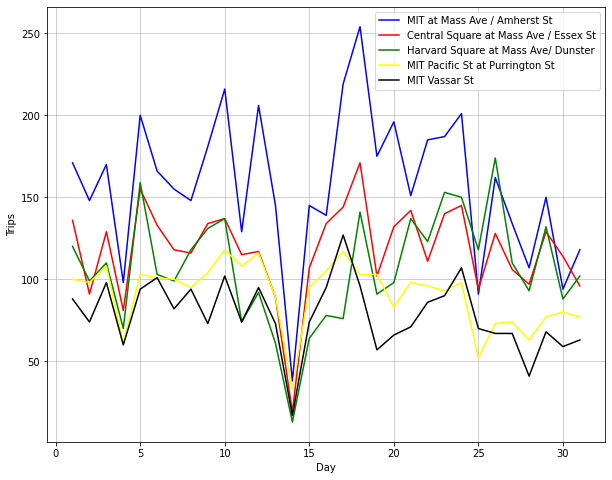

In [13]:
colors = ["blue", "red", "green", "yellow", "black"]

fig = plt.figure(figsize=(10, 8))

for color, station_name in zip(colors, top_five_stations):
    station_df = daily_trips_top_five[
        daily_trips_top_five["start station name"] == station_name
    ]

    plt.plot(
        station_df["start day"],
        station_df["daily trips"],
        color=color,
        label=station_name,
    )

plt.xlabel("Day")
plt.ylabel("Trips")
plt.grid(alpha=0.75)
plt.legend()

## Exercise: create a plot of daily station origin trips vs. station docks

Context: We're doing a study of the Bluebikes system, and we've identified daily
trips per dock as a metric we'd like to use to evaluate station usage. Using the
`trips_df` and `station_df` dataframes that have already been loaded, plot the
daily origin trips for each station against its dock count, and see if you can
identify any trends. Bonus points for using color effectively (e.g., coloring
points by district).

Hint: You'll need to use techniques you've learned across all three sessions. If
you're having trouble getting started, try to break the exercise down into a
series of bite-sized steps.

In [14]:
# write your code here